In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
all_xray_df = pd.read_csv('../input/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input', 'images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
#all_xray_df['Patient Age'] = all_xray_df['Patient Age'].map(lambda x: int(x[:-1]))
all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
86222,00021262_000.png,No Finding,0,21262,59,F,PA,2538,2991,0.143,0.143,NaN,../input/images_010/images/00021262_000.png
97269,00025662_001.png,Atelectasis|Nodule,1,25662,57,M,AP,3056,2544,0.139,0.139,NaN,../input/images_011/images/00025662_001.png
86793,00021409_009.png,Effusion,9,21409,25,M,PA,2992,2991,0.143,0.143,NaN,../input/images_010/images/00021409_009.png


# #  standardizing the Patient Age
 
 as said, we would like to standardize the age such that  $\mu = 0$ , $\sigma = 1$
 but first, let's verify that the distribution even resambles a normal one:

16.839847435449652


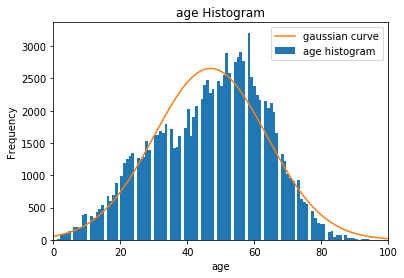

In [3]:
mu = np.mean(all_xray_df['Patient Age'])
sigma = np.std(all_xray_df['Patient Age'])
print(sigma)


plt.hist(all_xray_df['Patient Age'], bins=500)

plt.gca().set(title='age Histogram', ylabel='Frequency',xlabel = 'age');
plt.xlim([0, 100])

x_data = np.arange(0, 100, 0.001)

## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, mu, sigma)*len(all_xray_df['Patient Age'])


plt.plot(x_data,y_data)
plt.legend(["gaussian curve","age histogram"])

seems pretty close, let us standardize it

In [4]:
all_xray_df['Patient Age'] = (all_xray_df['Patient Age'])/ sigma - mu/sigma



now compute and display the new $\mu $ and $\sigma $

In [5]:
mu = np.mean(all_xray_df['Patient Age'])
sigma = np.std(all_xray_df['Patient Age'])

print(f'𝜇 = {mu},\t 𝜎 = {sigma}')

𝜇 = 5.275737828130905e-16,	 𝜎 = 1.0000000000000886


In [6]:
print(f'𝜇 = {mu},\t 𝜎 = {sigma}')

𝜇 = 5.275737828130905e-16,	 𝜎 = 1.0000000000000886


# Adjusting the output
Here we take the labels and make them into a more clear format. what's most important for us right now is to devide our label values into 2: cardiomegali diagnosed or not.

In [7]:
all_xray_df['Finding Labels'] = [x.split("|") for x in all_xray_df['Finding Labels']]


In [8]:
all_xray_df['Cardiomegaly'] = ['Cardiomegaly' in x for x in all_xray_df['Finding Labels']]

print(f"number of patients diagnosed with cardiomegaly: {np.sum(all_xray_df['Cardiomegaly'])}")

number of patients diagnosed with cardiomegaly: 2776


Let's see some images and spot the differences between diagnosed patients

True
True
True
False


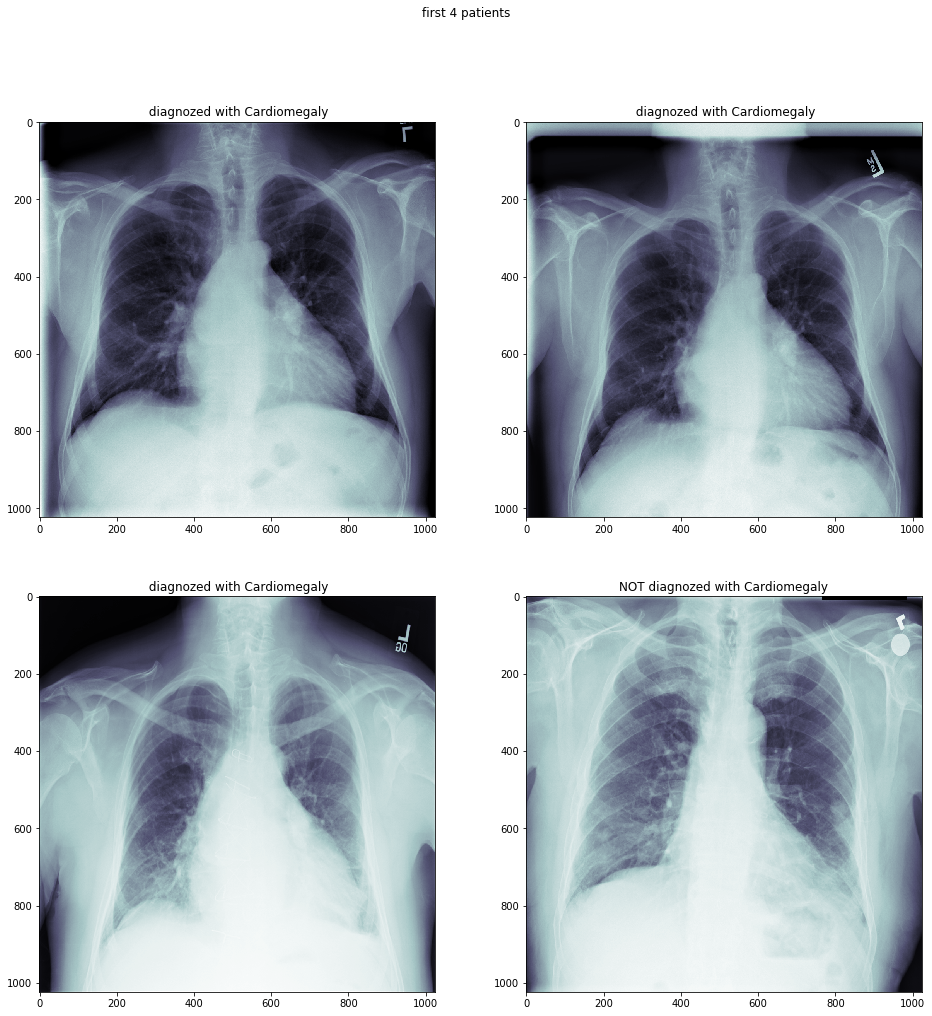

In [9]:
with_cardio = [plt.imread(all_xray_df['path'][i]) for i in range(4)]
# plt.imshow(with_cardio,cmap = 'bone')


fig, m_axs = plt.subplots(2, 2,figsize = (16, 16))
fig.suptitle('first 4 patients')

for i, ax in enumerate(m_axs.flatten()):
    
    print(all_xray_df['Cardiomegaly'][i])
    ax.imshow(with_cardio[i],cmap = 'bone')
    ax.set_title(f"{'NOT'*(not all_xray_df['Cardiomegaly'][i])} diagnozed with Cardiomegaly")

